# 5. Capstone Project - Hyperparameter Optimization; Naive Bayes

#### Loading data and libralies

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
# Original data set
original_df = pd.read_csv("./capstone_clean_heart_disease_fe.csv")

# Train set : Under sampled data set and Over sampled data set
under_sampled_df = pd.read_csv("./under_sampled_df_fe.csv")
over_sampled_df = pd.read_csv("./over_sampled_df_fe.csv")
# Test set : Under sampled data set and Over sampled data set
test_sampled_df = pd.read_csv("./test_sampled_df_fe.csv")
               
# Train set : SMOTE data set         
smote_df = pd.read_csv("./smote_df.csv")
# Test set : SMOTE data set  
test_smote_df = pd.read_csv("./test_smote_df.csv")

Split each dataset into train set and test set

In [3]:
# Split the original data set into train and test set
X = original_df.drop(columns="HeartDisease")
y = original_df["HeartDisease"]

from sklearn.model_selection import train_test_split

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, test_size = 0.3, random_state=42)

In [4]:
# Split other data set into X and y
X_train_under = under_sampled_df.drop(columns="HeartDisease")
y_train_under = under_sampled_df["HeartDisease"]

X_train_over = over_sampled_df.drop(columns="HeartDisease")
y_train_over = over_sampled_df["HeartDisease"]

X_test_sampled = test_sampled_df.drop(columns="HeartDisease")
y_test_sampled = test_sampled_df["HeartDisease"]

X_train_smote = smote_df.drop(columns="HeartDisease")
y_train_smote = smote_df["HeartDisease"]

X_test_smote = test_smote_df.drop(columns="HeartDisease")
y_test_smote = test_smote_df["HeartDisease"]

In [5]:
X_train = [X_train_original, X_train_under, X_train_over, X_train_smote]
X_test = [X_test_original, X_test_sampled, X_test_sampled, X_test_smote]
y_train = [y_train_original, y_train_under, y_train_over,y_train_smote]
y_test = [y_test_original, y_test_sampled, y_test_sampled, y_test_smote]

train_score = []
test_score = []

for index in range(4):
    
    scaler = StandardScaler()
    scaler.fit(X_train[index])
    X_scaled_train = scaler.transform(X_train[index])
    X_scaled_test = scaler.transform(X_test[index])
    
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_scaled_train,y_train[index])
    
    train_score.append(model.score(X_scaled_train,y_train[index])*100)
    test_score.append(model.score(X_scaled_test,y_test[index])*100)

In [6]:
before_selection = pd.DataFrame((train_score, test_score), columns=["Original", "Under Sampled", "Over Sampled", "SMOTE"], 
                                index=["Train score", "Test score"])
before_selection

,Original,Under Sampled,Over Sampled,SMOTE
Train score,91.452915,75.787020,75.675365,80.968618
Test score,91.389649,73.322747,73.284094,77.891185


**Festure selection: RFE**  
The columns that I'll use for modeling

In [7]:
# RFE : Original data final

from sklearn.feature_selection import RFE

scaler = StandardScaler()
scaler.fit(X_train_original)
X_scaled_train = scaler.transform(X_train_original)
X_scaled_test = scaler.transform(X_test_original)

rfe_original = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=7)
rfe_original.fit(X_scaled_train,y_train_original)
    
train_score_or_rfe = rfe_original.score(X_scaled_train,y_train_original)
test_score_or_rfe = rfe_original.score(X_scaled_test,y_test_original)

In [8]:
X_train_original.loc[:, rfe_original.support_]

,BMI,Smoking,DiffWalking,Sex,AgeCategory,GenHealth,Asthma
176993,27.12,1,0,1,35,3,0
267593,30.23,0,0,0,18,2,0
175707,32.55,0,0,1,60,3,0
317039,33.07,0,0,0,55,3,0
262926,23.06,0,0,1,30,4,0
...,...,...,...,...,...,...,...
119879,26.62,0,0,0,40,4,0
259178,25.04,0,0,1,25,4,0
131932,36.05,0,0,0,18,1,0
146867,27.44,0,0,0,40,3,0


In [9]:
# RFE : Under sampled data final

scaler = StandardScaler()
scaler.fit(X_train_under)
X_scaled_train = scaler.transform(X_train_under)
X_scaled_test = scaler.transform(X_test_sampled)
   
rfe_under = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=9)
rfe_under.fit(X_scaled_train,y_train_under)
    
train_score_u_rfe = rfe_under.score(X_scaled_train,y_train_under)
test_score_u_rfe = rfe_under.score(X_scaled_test,y_test_sampled)

In [10]:
X_train_under.loc[:, rfe_under.support_]

,Smoking,AlcoholDrinking,PhysicalHealth,DiffWalking,Sex,AgeCategory,GenHealth,Asthma,Race_Asian
0,1,0,0.0,0,1,65,1,0,0
1,0,0,5.0,0,0,80,0,0,0
2,0,0,0.0,0,0,40,4,0,0
3,0,0,7.0,1,0,60,2,0,0
4,1,0,0.0,0,1,70,3,0,0
...,...,...,...,...,...,...,...,...,...
38177,0,0,0.0,0,1,75,3,0,0
38178,0,0,30.0,1,0,50,0,0,0
38179,0,0,0.0,0,0,75,2,0,0
38180,1,0,15.0,0,1,70,3,0,0


In [11]:
# RFE : Over sampled data final

scaler = StandardScaler()
scaler.fit(X_train_over)
X_scaled_train = scaler.transform(X_train_over)
X_scaled_test = scaler.transform(X_test_sampled)
   
rfe_over = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=11)
rfe_over.fit(X_scaled_train,y_train_over)
    
train_score_ov_rfe = rfe_over.score(X_scaled_train,y_train_over)
test_score_ov_rfe = rfe_over.score(X_scaled_test,y_test_sampled)

In [12]:
X_train_over.loc[:, rfe_over.support_]

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,GenHealth,Asthma,Race_Asian
0,27.12,1,0,0.0,2.0,0,1,35,3,0,0
1,30.23,0,0,0.0,0.0,0,0,18,2,0,0
2,32.55,0,0,0.0,0.0,0,1,60,3,0,0
3,33.07,0,0,0.0,0.0,0,0,55,3,0,0
4,23.06,0,0,0.0,0.0,0,1,30,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...
408515,42.87,0,0,30.0,0.0,1,0,60,2,0,0
408516,24.41,0,0,0.0,0.0,0,1,65,2,0,0
408517,33.00,0,0,0.0,0.0,0,1,60,1,0,0
408518,31.32,1,0,3.0,2.0,0,0,65,2,1,0


In [13]:
# RFE : SMOTE data final

scaler = StandardScaler()
scaler.fit(X_train_smote)
X_scaled_train = scaler.transform(X_train_smote)
X_scaled_test = scaler.transform(X_test_smote)
    
rfe_smote = RFE(estimator=LogisticRegression(max_iter=1500, random_state=42), n_features_to_select=10)
rfe_smote.fit(X_scaled_train,y_train_smote)
    
train_score_s_rfe = rfe_smote.score(X_scaled_train,y_train_smote)
test_score_s_rfe = rfe_smote.score(X_scaled_test,y_test_smote)

In [14]:
X_train_smote.loc[:, rfe_smote.support_]

,AlcoholDrinking,AgeCategory,GenHealth,Asthma,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,35,3,0,0,0,0,0,0,1
1,0,18,2,0,0,0,0,1,0,0
2,0,60,3,0,0,0,0,0,0,1
3,0,55,3,0,0,0,0,1,0,0
4,0,30,4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
408515,0,80,1,0,0,0,0,0,0,1
408516,0,65,3,0,0,0,0,0,0,1
408517,0,70,2,0,0,0,0,0,0,0
408518,0,75,2,0,0,0,0,0,0,1


## Optimizing Hyperparameters: Naive Bayes Classifier

### Gaussian Naive Bayes

First, I'll create models without optimizing. GaussianNB supports continuous values and stores mean and standard deviation (sd) of each value for a continuous variables, so I'll use this method for now.

In [16]:
from sklearn.naive_bayes import GaussianNB

def naive_gaus(X_train, y_train, X_test, y_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_scaled_train = scaler.transform(X_train)
    X_scaled_test = scaler.transform(X_test)
    
    my_gaussian_nb = GaussianNB().fit(X_scaled_train, y_train)
    
    train_pred = my_gaussian_nb.predict(X_scaled_train)
    test_pred = my_gaussian_nb.predict(X_scaled_test)
    
    train_score = accuracy_score(y_train, train_pred)
    test_score = accuracy_score(y_test, test_pred)
    
    evaluation = classification_report(y_test, test_pred)
    
    return print(f"Train score: {train_score}\nTest score: {test_score}\n{evaluation}")

In [22]:
print("Original dataset")
naive_gaus(X_train_original.loc[:, rfe_original.support_], y_train_original, \
            X_test_original.loc[:, rfe_original.support_], y_test_original)

Original dataset
Train score: 0.8601976261579308
Test score: 0.8584860324690249
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     87544
           1       0.26      0.36      0.31      8178

    accuracy                           0.86     95722
   macro avg       0.60      0.63      0.61     95722
weighted avg       0.88      0.86      0.87     95722



The accuracy scores became lower than the result of logistic regression with original dataset. However, the recall score for 1 became higher, and the f1 score is improved, too.

In [23]:
print("Under sampled dataset")
naive_gaus(X_train_under.loc[:, rfe_under.support_], y_train_under, \
        X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

Under sampled dataset
Train score: 0.7373107747105966
Test score: 0.733196130461127
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     87544
           1       0.20      0.74      0.32      8178

    accuracy                           0.73     95722
   macro avg       0.59      0.74      0.58     95722
weighted avg       0.90      0.73      0.79     95722



In [24]:
print("Over sampled dataset")
naive_gaus(X_train_over.loc[:, rfe_over.support_], y_train_over, \
        X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

Over sampled dataset
Train score: 0.7328600802898267
Test score: 0.7393389189528008
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     87544
           1       0.21      0.72      0.32      8178

    accuracy                           0.74     95722
   macro avg       0.59      0.73      0.58     95722
weighted avg       0.90      0.74      0.79     95722



The accuracy scores and the evaluation scores of the both dataset are almost the same as the results of logistic regression.

In [25]:
print("SMOTE dataset")
naive_gaus(X_train_smote.loc[:, rfe_smote.support_], y_train_smote, \
        X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

SMOTE dataset
Train score: 0.6518163125428376
Test score: 0.3922295814964167
              precision    recall  f1-score   support

           0       0.95      0.36      0.52     87544
           1       0.10      0.78      0.18      8178

    accuracy                           0.39     95722
   macro avg       0.52      0.57      0.35     95722
weighted avg       0.87      0.39      0.49     95722



Almost all the scores are very low, especially the test accuracy score. It seems like SMOTE data doesn't do well with GaussianNB.

Split train set into train_v set and validation set first.

In [17]:
# Split the train set into train_v and validation

X_train_v_original, X_validation_original, y_train_v_original, y_validation_original = \
                train_test_split(X_train_original.loc[:, rfe_original.support_], y_train_original, test_size = 0.3, random_state=42)

X_train_v_under, X_validation_under, y_train_v_under, y_validation_under = \
                train_test_split(X_train_under.loc[:, rfe_under.support_], y_train_under, test_size = 0.3, random_state=42)

X_train_v_over, X_validation_over, y_train_v_over, y_validation_over = \
                train_test_split(X_train_over.loc[:, rfe_over.support_], y_train_over, test_size = 0.3, random_state=42)

X_train_v_smote, X_validation_smote, y_train_v_smote, y_validation_smote = \
                train_test_split(X_train_smote.loc[:, rfe_smote.support_], y_train_smote, test_size = 0.3, random_state=42)

In [18]:
# create a plot with log scaled
def gaussian_smoothing(v_smoothing, X_train, y_train, X_test, y_test):
    
    test_scores = []
    train_scores = []
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_scaled_train = scaler.transform(X_train)
    X_scaled_test = scaler.transform(X_test)
    
    for v in v_smoothing:
        my_g_nb = GaussianNB(var_smoothing = v)
        my_g_nb.fit(X_scaled_train, y_train)
        
        train_pred = my_g_nb.predict(X_scaled_train)
        test_pred = my_g_nb.predict(X_scaled_test)     
        
        # train on traning set
        train_scores.append(accuracy_score(y_train, train_pred))
        # score on validation set
        test_scores.append(accuracy_score(y_test, test_pred))
        
    plt.figure()
    plt.plot(v_smoothing, train_scores, label="Train Score",marker='.')
    plt.plot(v_smoothing, test_scores,label="Test Score",marker='.')
    plt.xscale('log')
    plt.xlabel('var_smoothing values')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show();

**Original dataset**

Original data: train_v and validation


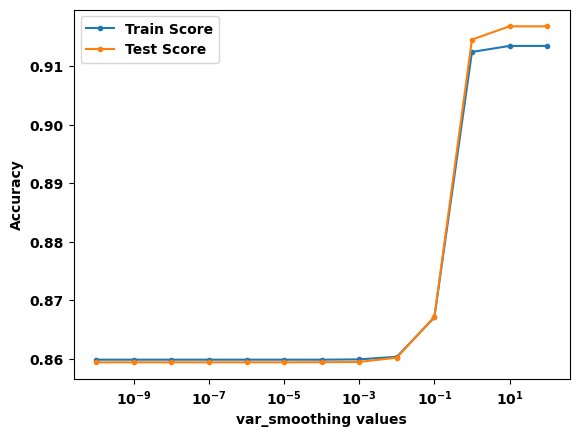

In [45]:
print("Original data: train_v and validation")
v_value = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
gaussian_smoothing(v_value, X_train_v_original, y_train_v_original, X_validation_original, y_validation_original)

The both scores improved when var_smoothing=1. However, the test score(validation set) is better than the train score, so the model became underfitting. Therefore, I'll check the accuracy scores with var_smoothing is less than 1 for train set and test set.

Original data: train and test


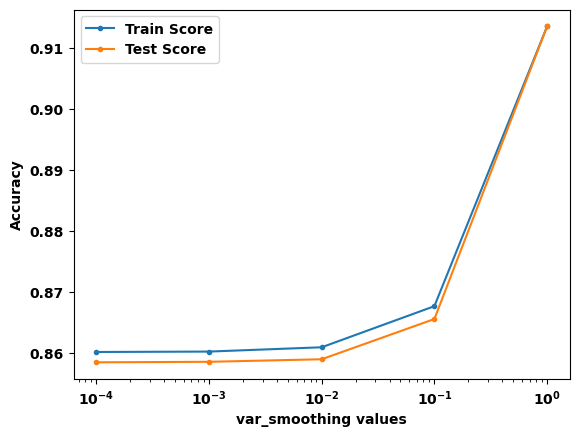

In [24]:
print("Original data: train and test")
v_value = [1e-4, 1e-3, 1e-2, 1e-1, 1]
gaussian_smoothing(v_value, X_train_original.loc[:, rfe_original.support_], y_train_original, X_test_original.loc[:, rfe_original.support_], y_test_original)

The accuracy scores stays flat until var_smoothing=1e-2 then get improved. Therefore, I'll use var_smoothing=1 and 1e-1 for the pipeline.

In [80]:
%%time

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

estimators = [('normalise', StandardScaler()),
              ('dim_reducer', None),
              ('model', GaussianNB())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [GaussianNB()], 
             'normalise': [StandardScaler(), MinMaxScaler(),None],
             'dim_reducer': [PCA(), KernelPCA(), None],
             'model__var_smoothing': [1e-1, 1, 10]}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_gnb_original = grid.fit(X_train_original.loc[:, rfe_original.support_], y_train_original)

fittedgrid_gnb_original.best_params_

CPU times: total: 14.7 s
Wall time: 18.9 s


C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fi

{'dim_reducer': PCA(),
 'model': GaussianNB(),
 'model__var_smoothing': 0.1,
 'normalise': None}

In [81]:
fittedgrid_gnb_original.score(X_train_original.loc[:, rfe_original.support_], y_train_original)


0.9145246719289369

In [82]:
fittedgrid_gnb_original.score(X_test_original.loc[:, rfe_original.support_], y_test_original)

0.9145650947535572

In [106]:
my_PCA = PCA()
my_PCA.fit(X_train_original.loc[:, rfe_original.support_])

X_train_PCA = my_PCA.transform(X_train_original.loc[:, rfe_original.support_])
X_test_PCA = my_PCA.transform(X_test_original.loc[:, rfe_original.support_])   
    
my_gau_nb = GaussianNB(var_smoothing=0.1).fit(X_train_PCA, y_train_original)
    
train_pred = my_gau_nb.predict(X_train_PCA)
test_pred = my_gau_nb.predict(X_test_PCA)
    
train_score = accuracy_score(y_train_original, train_pred)
test_score = accuracy_score(y_test_original, test_pred)
    
evaluation = classification_report(y_test_original, test_pred)
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{evaluation}")

Train score: 0.9145246719289369
Test score: 0.9145650947535572
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     87544
           1       0.00      0.00      0.00      8178

    accuracy                           0.91     95722
   macro avg       0.46      0.50      0.48     95722
weighted avg       0.84      0.91      0.87     95722



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy score was 85.849, so it improved. However, the score of precision an recall for 1 became 0, so the model is not predicting heart disease at all.

**Under sampled dataset**

Under sampled data: train_v and validation


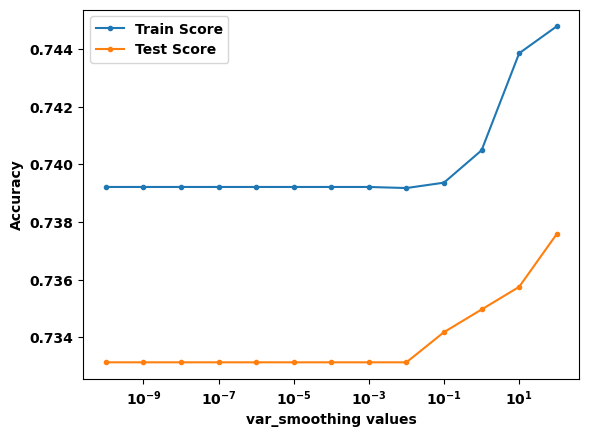

In [55]:
print("Under sampled data: train_v and validation")
v_value = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
gaussian_smoothing(v_value, X_train_v_under, y_train_v_under, X_validation_under, y_validation_under)

The accuracy score of test set started improving when var_smoothing=1e-2. Also, the train score started improving when var_smoothing=1e-1. Therefore, I'll check the accuracy score of var_smoothing from 1e-3 to 100.

Under sampled data: train and test


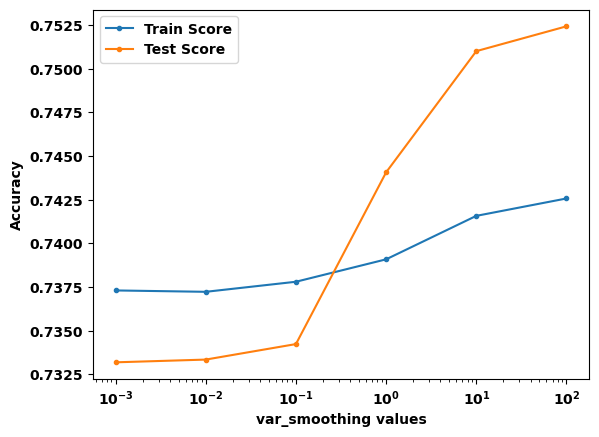

In [56]:
print("Under sampled data: train and test")
v_value = [1e-3, 1e-2, 1e-1, 1, 10, 100]
gaussian_smoothing(v_value, X_train_under.loc[:, rfe_under.support_], y_train_under, X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

The both accuracy scores were improving as var_smoothing is increasing. However, the test score became greater than the train score when var_smoothing is 1. Therefore, I'll use var_smoothing = 1e-2, 1e-1, 1 for the pipeline.  
The pipeline takes too long to execute, so I'll split the process into 2 steps. First, I'll find the best dimention reducer method, then I'll use the value and find the best other hyperparameters.

In [54]:
%%time

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

estimators = [('normalise', StandardScaler()),
              ('dim_reducer', None),
              ('model', GaussianNB())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [GaussianNB()], 
#             'normalise': [StandardScaler(), MinMaxScaler()],
             'dim_reducer': [PCA(), KernelPCA(), None]}
#             'model__var_smoothing': [1e-2, 1e-1, 1]}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_gnb_under = grid.fit(X_train_under.loc[:, rfe_under.support_], y_train_under)

fittedgrid_gnb_under.best_params_

CPU times: total: 19h 49min 27s
Wall time: 3h 15min 4s


{'dim_reducer': PCA(), 'model': GaussianNB()}

In [83]:
%%time

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

estimators = [('normalise', StandardScaler()),
              ('dim_reducer', None),
              ('model', GaussianNB())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [GaussianNB()], 
             'normalise': [StandardScaler(), MinMaxScaler(), None],
             'dim_reducer': [PCA()],
             'model__var_smoothing': [1e-2, 1e-1, 1, 10]}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_gnb_under = grid.fit(X_train_under.loc[:, rfe_under.support_], y_train_under)

fittedgrid_gnb_under.best_params_

CPU times: total: 1.72 s
Wall time: 3.44 s


{'dim_reducer': PCA(),
 'model': GaussianNB(),
 'model__var_smoothing': 1,
 'normalise': StandardScaler()}

In [84]:
fittedgrid_gnb_under.score(X_train_under.loc[:, rfe_under.support_], y_train_under)

0.7481273898695721

In [85]:
fittedgrid_gnb_under.score(X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

0.7421491402185495

In [108]:
scaler = StandardScaler()
scaler.fit(X_train_under.loc[:, rfe_under.support_])
X_scaled_train = scaler.transform(X_train_under.loc[:, rfe_under.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_under.support_])
    
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)

my_gaussian_nb = GaussianNB(var_smoothing=1).fit(X_train_PCA, y_train_under)
    
train_pred = my_gaussian_nb.predict(X_train_PCA)
test_pred = my_gaussian_nb.predict(X_test_PCA)
    
train_score = accuracy_score(y_train_under, train_pred)
test_score = accuracy_score(y_test_sampled, test_pred)
    
evaluation = classification_report(y_test_sampled, test_pred)
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{evaluation}")

Train score: 0.7481273898695721
Test score: 0.7421491402185495
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     87544
           1       0.21      0.75      0.33      8178

    accuracy                           0.74     95722
   macro avg       0.59      0.75      0.59     95722
weighted avg       0.91      0.74      0.80     95722



The accuracy scores were around 73 before optimizing hyperparameters, so the model is improved. The f1 score is also a little bit better.

**Over sampled data**

Over sampled data: train_v and validation


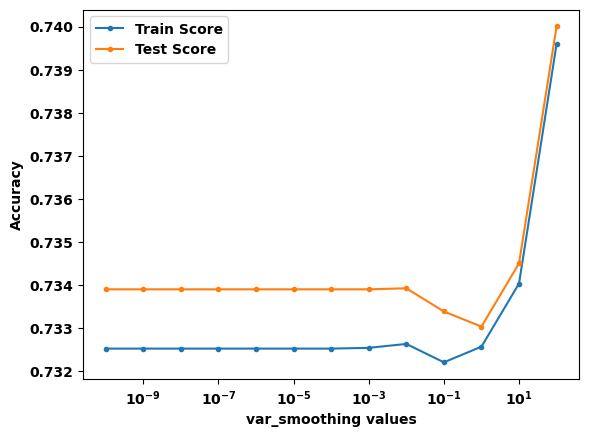

In [59]:
print("Over sampled data: train_v and validation")
v_value = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
gaussian_smoothing(v_value, X_train_v_over, y_train_v_over, X_validation_over, y_validation_over)

The accuracy scores get worse when var_smoothing=1e-1, then it starts improving when var_smoothing is around 1. However, the test score is greater than the train score entire time, so this dataset probably not good for modeling with GaussianNB. I'll check the accuracy scores with train set and test set using var_smoothing from 1e-3 to 100.

Over sampled data: train and test


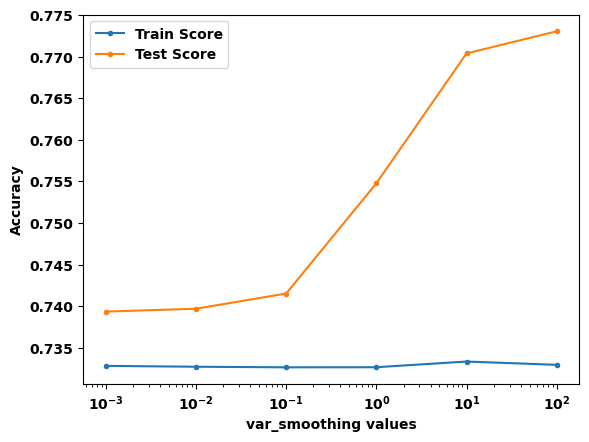

In [60]:
print("Over sampled data: train and test")
v_value = [1e-3, 1e-2, 1e-1, 1, 10, 100]
gaussian_smoothing(v_value, X_train_over.loc[:, rfe_over.support_], y_train_over, X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

The test scores are greater than the train scores entire time as well. The test score started inproving when var_smoothing=1e-1, but the train score is not. Therefore, I'll use var_smoothing=1e-1 and 1e-2 for the pipeline since the smaller difference between train score and test score is better.

In [19]:
%%time

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

estimators = [('normalise', StandardScaler()),
              ('dim_reducer', None),
              ('model', GaussianNB())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [GaussianNB()], 
#             'normalise': [StandardScaler(), MinMaxScaler()],
             'dim_reducer': [PCA(), KernelPCA(), None]}
#             'model__var_smoothing': [1e-2, 1e-1]}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_gnb_over = grid.fit(X_train_over.loc[:, rfe_over.support_], y_train_over)

fittedgrid_gnb_over.best_params_

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_

CPU times: total: 2.19 s
Wall time: 3.56 s


{'dim_reducer': PCA(), 'model': GaussianNB()}

In [86]:
%%time

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

estimators = [('normalise', StandardScaler()),
              ('dim_reducer', PCA()),
              ('model', GaussianNB())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [GaussianNB()], 
             'normalise': [StandardScaler(), MinMaxScaler(), None],
             'dim_reducer': [PCA()],
             'model__var_smoothing': [1e-2, 1e-1, 1]}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_gnb_over = grid.fit(X_train_over.loc[:, rfe_over.support_], y_train_over)

fittedgrid_gnb_over.best_params_

CPU times: total: 18 s
Wall time: 24.4 s


{'dim_reducer': PCA(),
 'model': GaussianNB(),
 'model__var_smoothing': 0.1,
 'normalise': StandardScaler()}

In [87]:
fittedgrid_gnb_over.score(X_train_over.loc[:, rfe_over.support_], y_train_over)

0.7496719866836385

In [88]:
fittedgrid_gnb_over.score(X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

0.7213075364075134

In [109]:
scaler = StandardScaler()
scaler.fit(X_train_over.loc[:, rfe_over.support_])
X_scaled_train = scaler.transform(X_train_over.loc[:, rfe_over.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_over.support_])
    
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)

my_gaussian_nb = GaussianNB(var_smoothing=0.1).fit(X_train_PCA, y_train_over)
    
train_pred = my_gaussian_nb.predict(X_train_PCA)
test_pred = my_gaussian_nb.predict(X_test_PCA)
    
train_score = accuracy_score(y_train_over, train_pred)
test_score = accuracy_score(y_test_sampled, test_pred)
    
evaluation = classification_report(y_test_sampled, test_pred)
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{evaluation}")

Train score: 0.7496719866836385
Test score: 0.7213075364075134
              precision    recall  f1-score   support

           0       0.97      0.72      0.82     87544
           1       0.21      0.79      0.33      8178

    accuracy                           0.72     95722
   macro avg       0.59      0.75      0.57     95722
weighted avg       0.91      0.72      0.78     95722



The train score is better than the test score, so optimizing hyperparameters improved the model. Also, the recall score for 1 improved, too.

**SMOTE data**

SMOTE data: train_v and validation


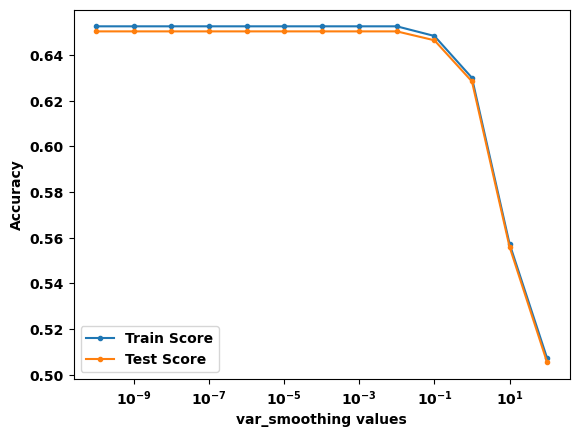

In [65]:
print("SMOTE data: train_v and validation")
v_value = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
gaussian_smoothing(v_value, X_train_v_smote, y_train_v_smote, X_validation_smote, y_validation_smote)

The both accuracy scores get worse when var_smoothing=1e-1. Therefore, I'll check the accuracy scores for train set and test set with var_smoothing less than 1e-1. 

SMOTE data: train and test


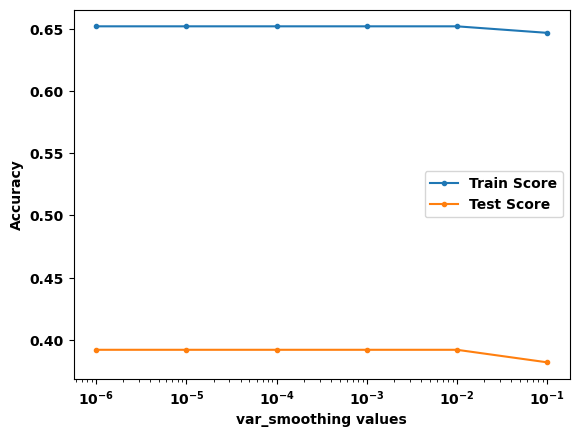

In [68]:
print("SMOTE data: train and test")
v_value = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
gaussian_smoothing(v_value, X_train_smote.loc[:, rfe_smote.support_], y_train_smote, X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

The both accuracy scores stay almost flat then get worse when var_smoothing=1e-1. Also, the test score is too low for predicting heart disease. Therefore, I won't use this method.

### Multinomial Naive Bayes

MultinomialNB is suitable for classification with discrete features. It fails when features have negative values, so I'll use MinMaxScaler for this modeling.

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

def naive_multi(X_train, y_train, X_test, y_test):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_scaled_train = scaler.transform(X_train)
    X_scaled_test = scaler.transform(X_test)
    
    my_multi_nb = MultinomialNB().fit(X_scaled_train, y_train)
    
    train_pred = my_multi_nb.predict(X_scaled_train)
    test_pred = my_multi_nb.predict(X_scaled_test)
    
    train_score = accuracy_score(y_train, train_pred)
    test_score = accuracy_score(y_test, test_pred)
    
    evaluation = classification_report(y_test, test_pred)
    
    return print(f"Train score: {train_score}\nTest score: {test_score}\n{evaluation}")

In [34]:
print("Original dataset")
naive_multi(X_train_original.loc[:, rfe_original.support_], y_train_original, \
            X_test_original.loc[:, rfe_original.support_], y_test_original)

Original dataset
Train score: 0.9145246719289369
Test score: 0.9145650947535572
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     87544
           1       0.00      0.00      0.00      8178

    accuracy                           0.91     95722
   macro avg       0.46      0.50      0.48     95722
weighted avg       0.84      0.91      0.87     95722



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The both scores of precision and recall are 0. This model is not predicting  heart disease at all. The model need to be adjusted.

In [35]:
print("Under sampled dataset")
naive_multi(X_train_under.loc[:, rfe_under.support_], y_train_under, \
        X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

Under sampled dataset
Train score: 0.6720444188361008
Test score: 0.7913332358287541
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     87544
           1       0.21      0.52      0.30      8178

    accuracy                           0.79     95722
   macro avg       0.58      0.67      0.59     95722
weighted avg       0.88      0.79      0.83     95722



In [36]:
print("Over sampled dataset")
naive_multi(X_train_over.loc[:, rfe_over.support_], y_train_over, \
        X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

Over sampled dataset
Train score: 0.672907079212768
Test score: 0.7937151334071583
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     87544
           1       0.21      0.52      0.30      8178

    accuracy                           0.79     95722
   macro avg       0.58      0.67      0.59     95722
weighted avg       0.88      0.79      0.83     95722



The all scores of under/over sampled dataset are almost the same. The both test score is greater than the train score, so they need to be adjusted, too. Comparing to the Logistic regression models, the recall scores of MultinomialNB are lower than the scores of Logistic regression.

In [30]:
print("SMOTE dataset")
naive_multi(X_train_smote.loc[:, rfe_smote.support_], y_train_smote, \
        X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

SMOTE dataset
Train score: 0.6847914422794478
Test score: 0.4944422389837237
              precision    recall  f1-score   support

           0       0.94      0.48      0.63     87544
           1       0.11      0.70      0.19      8178

    accuracy                           0.49     95722
   macro avg       0.53      0.59      0.41     95722
weighted avg       0.87      0.49      0.59     95722



The test score is too lower than the train set like the result of GaussianNB. This might not be able to use for the predintion.

All models of MultinomialNB have some problems, such as 0 for the f1 score, too underfitting, too low accuracy score. I considered those cannot improve by optimizing hyperparameters, so I'll move on to next NB method.

### Bernoulli Naive Bayes

BernoulliNB suitable for discrete data like MultinomialNB, but BernoulliNB is designed for binary/boolean features. The data I have is mostly binary/boolean features, but some of them is continuous variables, such as BMI. However, I'll give it a try.

In [31]:
from sklearn.naive_bayes import BernoulliNB
def naive_bernou(X_train, y_train, X_test, y_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_scaled_train = scaler.transform(X_train)
    X_scaled_test = scaler.transform(X_test)
    
    my_bernoulli_nb = BernoulliNB().fit(X_scaled_train, y_train)
    
    train_pred = my_bernoulli_nb.predict(X_scaled_train)
    test_pred = my_bernoulli_nb.predict(X_scaled_test)
    
    train_score = accuracy_score(y_train, train_pred)
    test_score = accuracy_score(y_test, test_pred)
    
    evaluation = classification_report(y_test, test_pred)
    
    return print(f"Train score: {train_score}\nTest score: {test_score}\n{evaluation}")

In [32]:
print("Original dataset")
naive_bernou(X_train_original.loc[:, rfe_original.support_], y_train_original, \
            X_test_original.loc[:, rfe_original.support_], y_test_original)

Original dataset
Train score: 0.8991318597185596
Test score: 0.8968575667035791
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     87544
           1       0.30      0.16      0.21      8178

    accuracy                           0.90     95722
   macro avg       0.61      0.56      0.58     95722
weighted avg       0.87      0.90      0.88     95722



In [33]:
print("Under sampled dataset")
naive_bernou(X_train_under.loc[:, rfe_under.support_], y_train_under, \
        X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

Under sampled dataset
Train score: 0.7243727410821853
Test score: 0.7600969474102087
              precision    recall  f1-score   support

           0       0.96      0.77      0.85     87544
           1       0.21      0.67      0.32      8178

    accuracy                           0.76     95722
   macro avg       0.59      0.72      0.59     95722
weighted avg       0.90      0.76      0.81     95722



In [34]:
print("Over sampled dataset")
naive_bernou(X_train_over.loc[:, rfe_over.support_], y_train_over, \
        X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

Over sampled dataset
Train score: 0.7252056202878684
Test score: 0.7465786339608449
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     87544
           1       0.21      0.69      0.32      8178

    accuracy                           0.75     95722
   macro avg       0.58      0.72      0.58     95722
weighted avg       0.90      0.75      0.80     95722



In [35]:
print("SMOTE dataset")
naive_bernou(X_train_smote.loc[:, rfe_smote.support_], y_train_smote, \
        X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

SMOTE dataset
Train score: 0.7316288064231862
Test score: 0.8098138358997932
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     87544
           1       0.23      0.50      0.31      8178

    accuracy                           0.81     95722
   macro avg       0.59      0.67      0.60     95722
weighted avg       0.89      0.81      0.84     95722



In [42]:
# create a plot with log scaled
def bernoulli_alpha(b_alpha, X_train, y_train, X_test, y_test):
    
    test_scores = []
    train_scores = []
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_scaled_train = scaler.transform(X_train)
    X_scaled_test = scaler.transform(X_test)
    
    for a in b_alpha:
        my_b_nb = BernoulliNB(alpha = a)
        my_b_nb.fit(X_scaled_train, y_train)
        
        train_pred = my_b_nb.predict(X_scaled_train)
        test_pred = my_b_nb.predict(X_scaled_test)     
        
        # train on traning set
        train_scores.append(accuracy_score(y_train, train_pred))
        # score on validation set
        test_scores.append(accuracy_score(y_test, test_pred))
        
    plt.figure()
    plt.plot(b_alpha, train_scores, label="Train Score",marker='.')
    plt.plot(b_alpha, test_scores,label="Test Score",marker='.')
#    plt.xscale('log')
    plt.xlabel('alpha values')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show();

Original data: train_v and validation


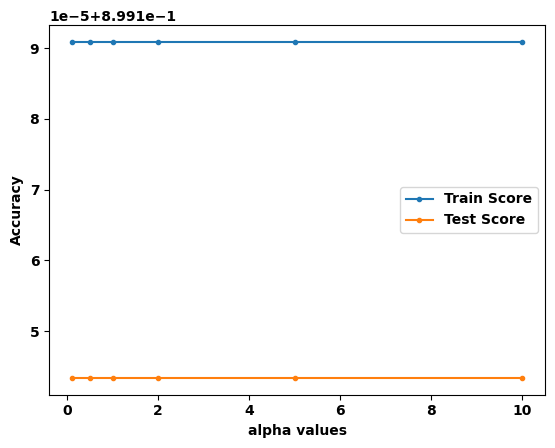

In [43]:
print("Original data: train_v and validation")
b_alpha = [0.1, 0.5, 1, 2, 5, 10]
bernoulli_alpha(b_alpha, X_train_v_original, y_train_v_original, X_validation_original, y_validation_original)

The accuracy score doesn't cgange by the alpha values. I'll use the same alpha values for the train/test set.

Original data: train and test


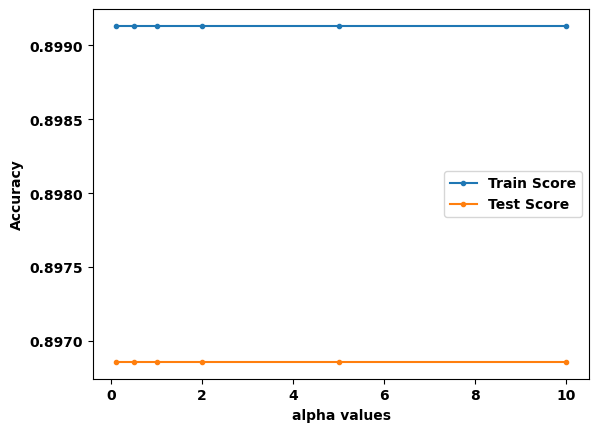

In [44]:
print("Original data: train and test")
b_alpha = [0.1, 0.5, 1, 2, 5, 10]
bernoulli_alpha(b_alpha, X_train_original.loc[:, rfe_original.support_], y_train_original, X_test_original.loc[:, rfe_original.support_], y_test_original)

The accuracy score doesn't cgange by the alpha values for the model of train and test set. I'll use 1, 5, 10, and 0 for the alpha of pipeline.

In [51]:
%%time

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

estimators = [('normalise', StandardScaler()),
              ('dim_reducer', None),
              ('model', BernoulliNB())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [BernoulliNB()], 
             'normalise': [StandardScaler(), MinMaxScaler()],
             'dim_reducer': [PCA(), KernelPCA(), None],
             'model__alpha': [0, 1, 5, 10],
             'model__force_alpha': [True, False],
             'model__fit_prior': [True, False]}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_bnb_original = grid.fit(X_train_original.loc[:, rfe_original.support_], y_train_original)

fittedgrid_bnb_original.best_params_

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in n

CPU times: total: 29.4 s
Wall time: 41.3 s


C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **

{'dim_reducer': PCA(),
 'model': BernoulliNB(),
 'model__alpha': 0,
 'model__fit_prior': True,
 'model__force_alpha': True,
 'normalise': StandardScaler()}

In [52]:
fittedgrid_bnb_original.score(X_train_original.loc[:, rfe_original.support_], y_train_original)

0.9145246719289369

In [53]:
fittedgrid_bnb_original.score(X_test_original.loc[:, rfe_original.support_], y_test_original)

0.9145650947535572

In [101]:
scaler = MinMaxScaler()
scaler.fit(X_train_original.loc[:, rfe_original.support_])
X_scaled_train = scaler.transform(X_train_original.loc[:, rfe_original.support_])
X_scaled_test = scaler.transform(X_test_original.loc[:, rfe_original.support_])
    
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)   
    
my_berno_nb = BernoulliNB(alpha=0, fit_prior=True, force_alpha=True).fit(X_train_PCA, y_train_original)
    
train_pred = my_berno_nb.predict(X_train_PCA)
test_pred = my_berno_nb.predict(X_test_PCA)
    
train_score = accuracy_score(y_train_original, train_pred)
test_score = accuracy_score(y_test_original, test_pred)
    
evaluation = classification_report(y_test_original, test_pred)
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{evaluation}")

Train score: 0.9145246719289369
Test score: 0.9145650947535572
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     87544
           1       0.00      0.00      0.00      8178

    accuracy                           0.91     95722
   macro avg       0.46      0.50      0.48     95722
weighted avg       0.84      0.91      0.87     95722



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy score improved, but the precision and recall score for 1 became 0. Thefore, the model before the pipeline is better. However, the recall score is 0.16 and the precision score is not high either.

**Under sampled data**

Under sampled data: train_v and validation


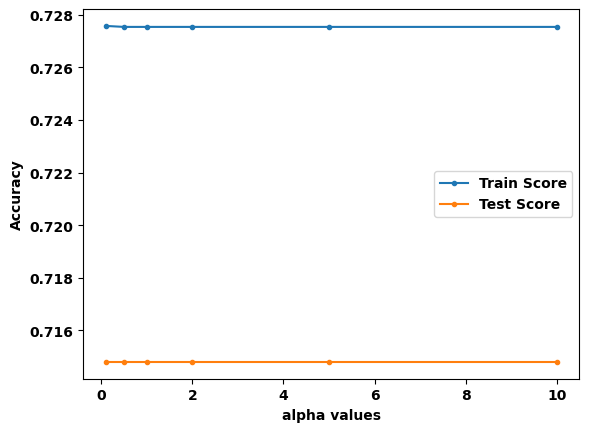

In [45]:
print("Under sampled data: train_v and validation")
b_alpha = [0.1, 0.5, 1, 2, 5, 10]
bernoulli_alpha(b_alpha, X_train_v_under, y_train_v_under, X_validation_under, y_validation_under)

The accuracy score doesn't cgange by the alpha values. I'll use the same alpha values for the train/test set.

Under sampled data: train and test


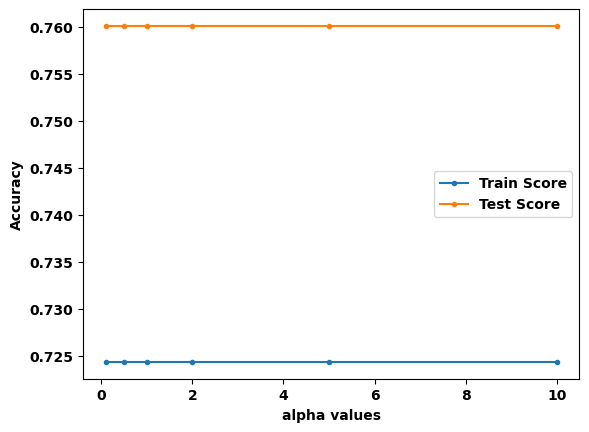

In [46]:
print("Under sampled data: train and test")
b_alpha = [0.1, 0.5, 1, 2, 5, 10]
bernoulli_alpha(b_alpha, X_train_under.loc[:, rfe_under.support_], y_train_under, X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

The accuracy score doesn't cgange by the alpha values for the model of train and test set. Also, the test score is greater than the train score, so the model is underfitting.  
I'll use 1, 5, 10, and 0 for the alpha of pipeline. Also, the same code of the pipeline earlier takes long time to execute for the under sampled dataset, so I'll split the pipeline into 2 steps.

In [72]:
%%time

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

estimators = [('normalise', StandardScaler()),
              ('dim_reducer', None),
              ('model', BernoulliNB())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [BernoulliNB()], 
#             'normalise': [StandardScaler(), MinMaxScaler()],
             'dim_reducer': [PCA(), KernelPCA(), None]}
#             'model__alpha': [0, 1, 5, 10],
#             'model__force_alpha': [True, False],
#             'model__fit_prior': [True, False]}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_bnb_under = grid.fit(X_train_under.loc[:, rfe_under.support_], y_train_under)

fittedgrid_bnb_under.best_params_

CPU times: total: 17h 36min 46s
Wall time: 3h 31min 46s


{'dim_reducer': None, 'model': BernoulliNB()}

In [74]:
%%time

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

estimators = [('normalise', StandardScaler()),
              ('dim_reducer', None),
              ('model', BernoulliNB())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [BernoulliNB()], 
             'normalise': [StandardScaler(), MinMaxScaler()],
             'dim_reducer': [None],
             'model__alpha': [0, 1, 5, 10,100],
             'model__force_alpha': [True, False],
             'model__fit_prior': [True, False]}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_bnb_under = grid.fit(X_train_under.loc[:, rfe_under.support_], y_train_under)

fittedgrid_bnb_under.best_params_

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in n

CPU times: total: 1.36 s
Wall time: 4.03 s


{'dim_reducer': None,
 'model': BernoulliNB(),
 'model__alpha': 10,
 'model__fit_prior': True,
 'model__force_alpha': True,
 'normalise': StandardScaler()}

In [75]:
fittedgrid_bnb_under.score(X_train_under.loc[:, rfe_under.support_], y_train_under)

0.7243727410821853

In [76]:
fittedgrid_bnb_under.score(X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

0.7600969474102087

In [102]:
scaler = StandardScaler()
scaler.fit(X_train_under.loc[:, rfe_under.support_])
X_scaled_train = scaler.transform(X_train_under.loc[:, rfe_under.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_under.support_])
      
my_berno_nb = BernoulliNB(alpha=10, fit_prior=True, force_alpha=True).fit(X_scaled_train, y_train_under)
    
train_pred = my_berno_nb.predict(X_scaled_train)
test_pred = my_berno_nb.predict(X_scaled_test)
    
train_score = accuracy_score(y_train_under, train_pred)
test_score = accuracy_score(y_test_sampled, test_pred)
    
evaluation = classification_report(y_test_sampled, test_pred)
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{evaluation}")

Train score: 0.7243727410821853
Test score: 0.7600969474102087
              precision    recall  f1-score   support

           0       0.96      0.77      0.85     87544
           1       0.21      0.67      0.32      8178

    accuracy                           0.76     95722
   macro avg       0.59      0.72      0.59     95722
weighted avg       0.90      0.76      0.81     95722



The model is still underfitting and any of the scores couldn't improved.

**Over sampled data**

Over sampled data: train_v and validation


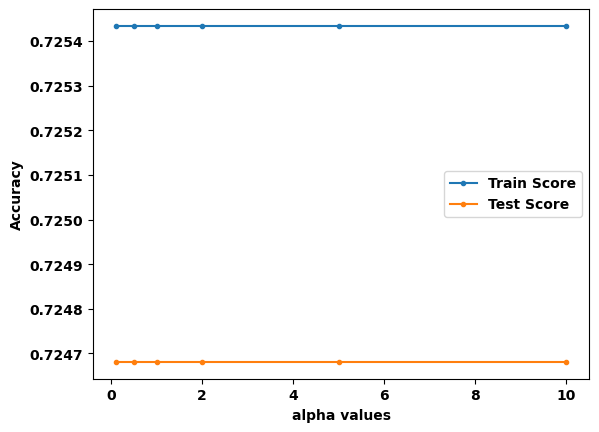

In [47]:
print("Over sampled data: train_v and validation")
b_alpha = [0.1, 0.5, 1, 2, 5, 10]
bernoulli_alpha(b_alpha, X_train_v_over, y_train_v_over, X_validation_over, y_validation_over)

The accuracy score doesn't cgange by the alpha values. I'll use the same alpha values for the train/test set.

Over sampled data: train and test


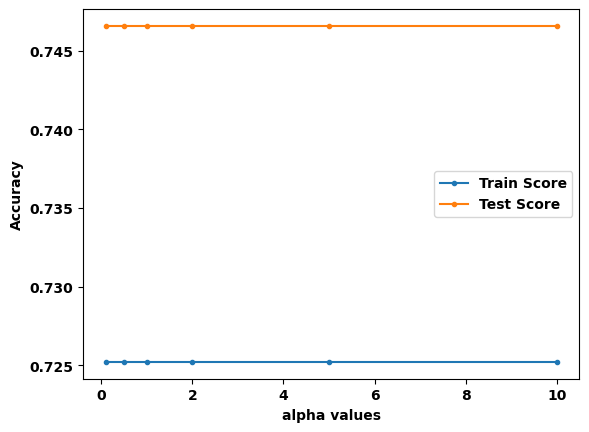

In [48]:
print("Over sampled data: train and test")
b_alpha = [0.1, 0.5, 1, 2, 5, 10]
bernoulli_alpha(b_alpha, X_train_over.loc[:, rfe_over.support_], y_train_over, X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

The accuracy score doesn't cgange by the alpha values for the model of train and test set. Also, the test score is greater than the train score, so the model is underfitting.
I'll use 1, 5, 10, and 0 for the alpha of pipeline. Also, the same code of the pipeline earlier takes long time to execute for the over sampled dataset, so I'll split the pipeline into 2 steps.

In [54]:
%%time

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

estimators = [('normalise', StandardScaler()),
              ('dim_reducer', None),
              ('model', BernoulliNB())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [BernoulliNB()], 
#             'normalise': [StandardScaler(), MinMaxScaler()],
             'dim_reducer': [PCA(), KernelPCA(), None]}
#             'model__alpha': [0, 1, 5, 10],
#             'model__force_alpha': [True, False],
#             'model__fit_prior': [True, False]}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_bnb_over = grid.fit(X_train_over.loc[:, rfe_over.support_], y_train_over)

fittedgrid_bnb_over.best_params_

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_

CPU times: total: 3.11 s
Wall time: 3.69 s


{'dim_reducer': None, 'model': BernoulliNB()}

In [55]:
%%time

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

estimators = [('normalise', StandardScaler()),
              ('dim_reducer', None),
              ('model', BernoulliNB())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [BernoulliNB()], 
             'normalise': [StandardScaler(), MinMaxScaler()],
             'dim_reducer': [None],
             'model__alpha': [0, 1, 5, 10],
             'model__force_alpha': [True, False],
             'model__fit_prior': [True, False]}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_bnb_over = grid.fit(X_train_over.loc[:, rfe_over.support_], y_train_over)

fittedgrid_bnb_over.best_params_

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:1227: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:1230: RuntimeWarning: invalid value encountered in add
  jll += self.class_log_prior_ + neg_prob.sum(axis=1)
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:1227: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:1230: RuntimeWarning: invalid value encountered in add
  jll += self.class_log_prior_ + neg_prob.sum(axis=1)
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:1227: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered i

CPU times: total: 28.8 s
Wall time: 31.9 s


{'dim_reducer': None,
 'model': BernoulliNB(),
 'model__alpha': 0,
 'model__fit_prior': True,
 'model__force_alpha': True,
 'normalise': StandardScaler()}

In [56]:
fittedgrid_bnb_over.score(X_train_over.loc[:, rfe_over.support_], y_train_over)

0.7252056202878684

In [57]:
fittedgrid_bnb_over.score(X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

0.7465786339608449

In [103]:
scaler = StandardScaler()
scaler.fit(X_train_over.loc[:, rfe_over.support_])
X_scaled_train = scaler.transform(X_train_over.loc[:, rfe_over.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_over.support_])
      
my_berno_nb = BernoulliNB(alpha=0, fit_prior=True, force_alpha=True).fit(X_scaled_train, y_train_over)
    
train_pred = my_berno_nb.predict(X_scaled_train)
test_pred = my_berno_nb.predict(X_scaled_test)
    
train_score = accuracy_score(y_train_over, train_pred)
test_score = accuracy_score(y_test_sampled, test_pred)
    
evaluation = classification_report(y_test_sampled, test_pred)
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{evaluation}")

Train score: 0.7252056202878684
Test score: 0.7465786339608449
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     87544
           1       0.21      0.69      0.32      8178

    accuracy                           0.75     95722
   macro avg       0.58      0.72      0.58     95722
weighted avg       0.90      0.75      0.80     95722



The model is still underfitting and any of the scores couldn't improved.

**SMOTE data**

SMOTE data: train_v and validation


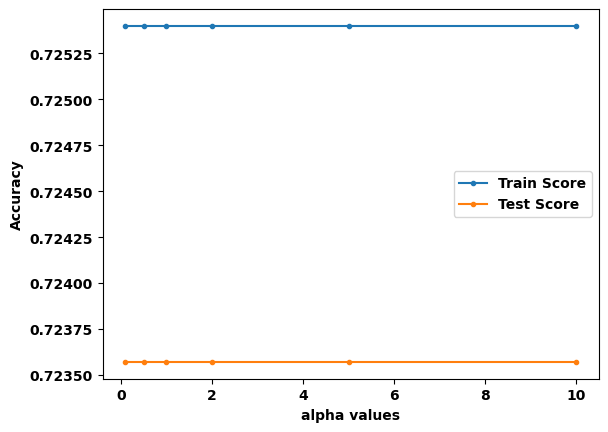

In [49]:
print("SMOTE data: train_v and validation")
b_alpha = [0.1, 0.5, 1, 2, 5, 10]
bernoulli_alpha(b_alpha, X_train_v_smote, y_train_v_smote, X_validation_smote, y_validation_smote)

The accuracy score doesn't cgange by the alpha values. I'll use the same alpha values for the train/test set.

SMOTE data: train and test


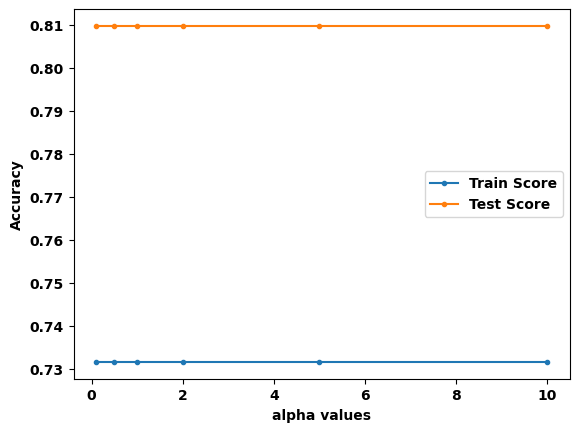

In [50]:
print("SMOTE data: train and test")
b_alpha = [0.1, 0.5, 1, 2, 5, 10]
bernoulli_alpha(b_alpha, X_train_smote.loc[:, rfe_smote.support_], y_train_smote, X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

The accuracy score doesn't cgange by the alpha values for the model of train and test set. Also, the test score is greater than the train score, so the model is underfitting.
I'll use 1, 5, 10, and 0 for the alpha of pipeline. Also, the same code of the pipeline earlier takes long time to execute for the SMOTE dataset, so I'll split the pipeline into 2 steps.

In [58]:
%%time

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

estimators = [('normalise', StandardScaler()),
              ('dim_reducer', None),
              ('model', BernoulliNB())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [BernoulliNB()], 
#             'normalise': [StandardScaler(), MinMaxScaler()],
             'dim_reducer': [PCA(), KernelPCA(), None]}
#             'model__alpha': [0, 1, 5, 10],
#             'model__force_alpha': [True, False],
#             'model__fit_prior': [True, False]}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_bnb_smote = grid.fit(X_train_smote.loc[:, rfe_smote.support_], y_train_smote)

fittedgrid_bnb_smote.best_params_

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_

CPU times: total: 2.64 s
Wall time: 3.21 s


{'dim_reducer': PCA(), 'model': BernoulliNB()}

In [77]:
%%time

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

estimators = [('normalise', StandardScaler()),
              ('dim_reducer', None),
              ('model', BernoulliNB())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [BernoulliNB()], 
             'normalise': [StandardScaler(), MinMaxScaler(), None],
             'dim_reducer': [PCA()],
             'model__alpha': [0, 1, 5, 10],
             'model__force_alpha': [True, False],
             'model__fit_prior': [True, False]}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_bnb_smote = grid.fit(X_train_smote.loc[:, rfe_smote.support_], y_train_smote)

fittedgrid_bnb_smote.best_params_

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in n

CPU times: total: 1min 31s
Wall time: 1min 59s


{'dim_reducer': PCA(),
 'model': BernoulliNB(),
 'model__alpha': 0,
 'model__fit_prior': True,
 'model__force_alpha': True,
 'normalise': StandardScaler()}

In [78]:
fittedgrid_bnb_smote.score(X_train_smote.loc[:, rfe_smote.support_], y_train_smote)

0.759289630862626

In [79]:
fittedgrid_bnb_smote.score(X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

0.7693006832285159

In [107]:
scaler = StandardScaler()
scaler.fit(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_train = scaler.transform(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_test = scaler.transform(X_test_smote.loc[:, rfe_smote.support_])
    
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)   
    
my_berno_nb = BernoulliNB(alpha=0, fit_prior=True, force_alpha=True).fit(X_train_PCA, y_train_smote)
    
train_pred = my_berno_nb.predict(X_train_PCA)
test_pred = my_berno_nb.predict(X_test_PCA)
    
train_score = accuracy_score(y_train_smote, train_pred)
test_score = accuracy_score(y_test_smote, test_pred)
    
evaluation = classification_report(y_test_smote, test_pred)
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{evaluation}")

Train score: 0.759289630862626
Test score: 0.7693006832285159
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     87544
           1       0.19      0.53      0.28      8178

    accuracy                           0.77     95722
   macro avg       0.57      0.66      0.57     95722
weighted avg       0.88      0.77      0.81     95722



The model became less underfitting. Therefore, the f1 score became lower.

I thoght the models of BernoulliNB can improve better at the begining, but any models couldn't improved. That may be why my dataset have continuos features besides binary features.  

### Model Comparison

All models of BernoulliNB cannot be used same as GaussianNB model with original data and SMOTE data. Therefore, I'll compare 2 models below.

In [112]:
scaler = StandardScaler()
scaler.fit(X_train_under.loc[:, rfe_under.support_])
X_scaled_train = scaler.transform(X_train_under.loc[:, rfe_under.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_under.support_])
    
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)

my_gaussian_nb = GaussianNB(var_smoothing=1).fit(X_train_PCA, y_train_under)
    
train_pred = my_gaussian_nb.predict(X_train_PCA)
test_pred = my_gaussian_nb.predict(X_test_PCA)
    
train_score = accuracy_score(y_train_under, train_pred)
test_score = accuracy_score(y_test_sampled, test_pred)
    
evaluation = classification_report(y_test_sampled, test_pred)
    
print(f"Under Sampled data\nTrain score: {train_score}\nTest score: {test_score}\n{evaluation}")

Under Sampled data
Train score: 0.7481273898695721
Test score: 0.7421491402185495
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     87544
           1       0.21      0.75      0.33      8178

    accuracy                           0.74     95722
   macro avg       0.59      0.75      0.59     95722
weighted avg       0.91      0.74      0.80     95722



In [113]:
scaler = StandardScaler()
scaler.fit(X_train_over.loc[:, rfe_over.support_])
X_scaled_train = scaler.transform(X_train_over.loc[:, rfe_over.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_over.support_])
    
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)

my_gaussian_nb = GaussianNB(var_smoothing=0.1).fit(X_train_PCA, y_train_over)
    
train_pred = my_gaussian_nb.predict(X_train_PCA)
test_pred = my_gaussian_nb.predict(X_test_PCA)
    
train_score = accuracy_score(y_train_over, train_pred)
test_score = accuracy_score(y_test_sampled, test_pred)
    
evaluation = classification_report(y_test_sampled, test_pred)
    
print(f"Over Sampled data\nTrain score: {train_score}\nTest score: {test_score}\n{evaluation}")

Over Sampled data
Train score: 0.7496719866836385
Test score: 0.7213075364075134
              precision    recall  f1-score   support

           0       0.97      0.72      0.82     87544
           1       0.21      0.79      0.33      8178

    accuracy                           0.72     95722
   macro avg       0.59      0.75      0.57     95722
weighted avg       0.91      0.72      0.78     95722



The test score of under sampled data is greater than the test score of over sampled data. However, the recall score of over sampled data is better than under sampled data's. I'd like to give importance to recall score, i'll keep the model with over sampled data.

**From Naive Bayes Clasifier: Over Sampled dataset**